In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )
import os
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import plotly.express as px
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import scrapy
from nltk.stem import WordNetLemmatizer
import spacy


In [2]:
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
lem= WordNetLemmatizer()
#inti_notebook_mode(connected = True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

[nltk_data] Downloading package stopwords to C:\Users\Sumeet
[nltk_data]     Maheshwari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sumeet
[nltk_data]     Maheshwari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Sumeet
[nltk_data]     Maheshwari\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df1 = pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
df2 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [4]:
df1.head()

article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0

In [5]:
df2.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [6]:
df1.shape

(26709, 3)

In [7]:
df2.shape

(28619, 3)

In [8]:
df1.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [9]:
df2.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [10]:
df1.duplicated().sum()

1

In [11]:
df2.duplicated().sum()

2

In [12]:
df1.drop_duplicates(inplace = True)
df2.drop_duplicates(inplace=True)

In [13]:
df1.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [14]:
df2.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26708 non-null  object
 1   headline      26708 non-null  object
 2   is_sarcastic  26708 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 834.6+ KB


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28617 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28617 non-null  int64 
 1   headline      28617 non-null  object
 2   article_link  28617 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


In [17]:
df1.describe()

is_sarcastic
count  26708.000000
mean       0.438970
std        0.496271
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [18]:
df2.describe()


is_sarcastic
count  28617.000000
mean       0.476395
std        0.499451
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000

In [19]:
df1.nunique()

article_link    26708
headline        26602
is_sarcastic        2
dtype: int64

In [20]:
df2.nunique()

is_sarcastic        2
headline        28503
article_link    28617
dtype: int64

# Plots

In [21]:
df1['is_sarcastic'].value_counts()

0    14984
1    11724
Name: is_sarcastic, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

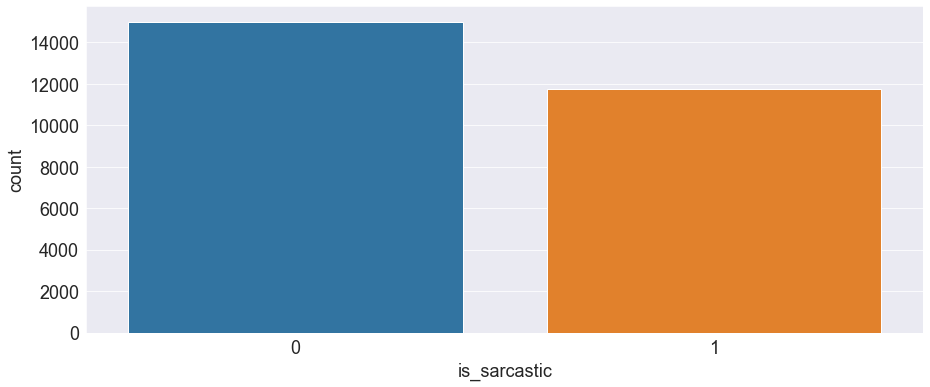

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(df1['is_sarcastic'])
plt.show

In [23]:
df2['is_sarcastic'].value_counts()

0    14984
1    13633
Name: is_sarcastic, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

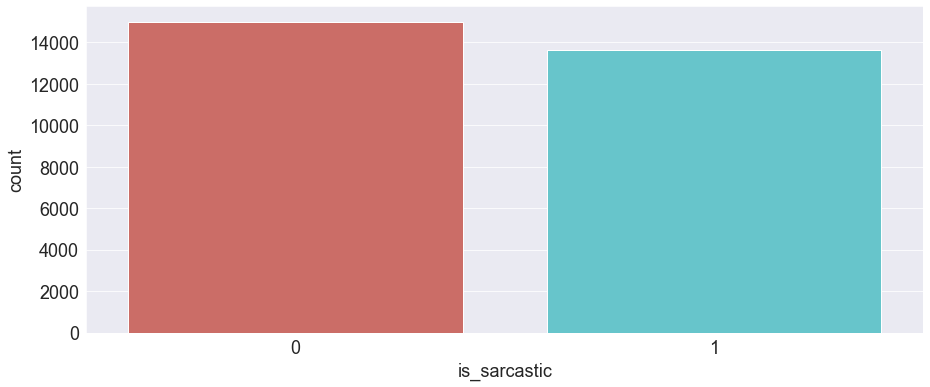

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(df2['is_sarcastic'],palette='hls')
plt.show

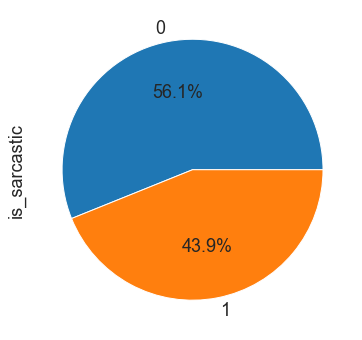

In [25]:
plt.figure(figsize=(9,6))
df1['is_sarcastic'].value_counts().plot(kind = 'pie', autopct ='%1.1f%%')
plt.show()

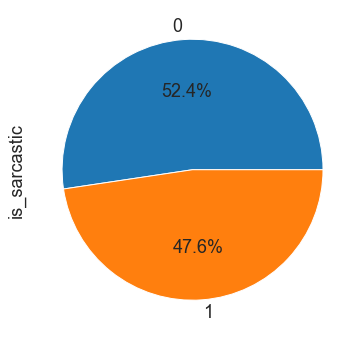

In [26]:
plt.figure(figsize=(9,6))
df2['is_sarcastic'].value_counts().plot(kind = 'pie', autopct ='%1.1f%%')
plt.show()

In [27]:
df1 = df1[['is_sarcastic','headline']]
df2 = df2[['is_sarcastic','headline']]

In [28]:
df =pd.concat([df1,df2])
df.reset_index(drop=True,inplace=True)

In [29]:
df.head()

is_sarcastic                                           headline
0             0  former versace store clerk sues over secret 'b...
1             0  the 'roseanne' revival catches up to our thorn...
2             1  mom starting to fear son's web series closest ...
3             1  boehner just wants wife to listen, not come up...
4             0  j.k. rowling wishes snape happy birthday in th...

In [30]:
df.shape

(55325, 2)

In [31]:
df.groupby('is_sarcastic').count().reset_index()

is_sarcastic  headline
0             0     29968
1             1     25357

In [32]:
fig1 =px.bar(df.groupby('is_sarcastic').count().reset_index(),x='headline', title='count of sarcastic and Headline') 

In [33]:
fig1

# Data Cleaning

In [34]:
stop_word = stopwords.words('english')
stop_word.remove('not')

def text_cleaning(x):
    
    headline = re.sub('\s+\n+',' ',x)# eliminate duplicate whitespace using re
    headline = re.sub('[^a-zA-Z0-9]',' ',x)
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lem.lemmatize(word,'v')for word in headline if not word in stop_word]
    headline= ' '.join(headline)
    
    return headline

In [35]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

df['Entity'] = df['headline'].progress_apply(get_entities)

100%|███████████████████████████████████████████████████████████████████████████| 55325/55325 [05:13<00:00, 176.32it/s]


In [36]:
df['clean_headline'] = df['headline'].apply(text_cleaning)

In [37]:
df['sentence_lenght'] = df['clean_headline'].apply(lambda x : len(x.split()))

In [38]:
df.head()

is_sarcastic                                           headline Entity  \
0             0  former versace store clerk sues over secret 'b...          
1             0  the 'roseanne' revival catches up to our thorn...          
2             1  mom starting to fear son's web series closest ...          
3             1  boehner just wants wife to listen, not come up...          
4             0  j.k. rowling wishes snape happy birthday in th...          

                                      clean_headline  sentence_lenght  
0  former versace store clerk sue secret black co...               10  
1  roseanne revival catch thorny political mood b...                8  
2  mom start fear son web series closest thing gr...                9  
3  boehner want wife listen not come alternative ...               10  
4  j k rowling wish snape happy birthday magical way                9

In [39]:
df.tail()

is_sarcastic                                           headline  \
55320             1       jews to celebrate rosh hashasha or something   
55321             1  internal affairs investigator disappointed con...   
55322             0  the most beautiful acceptance speech this week...   
55323             1  mars probe destroyed by orbiting spielberg-gat...   
55324             1                 dad clarifies this not a food stop   

          Entity                                     clean_headline  \
55320        ORG             jews celebrate rosh hashasha something   
55321             internal affairs investigator disappoint consp...   
55322  DATE,NORP  beautiful acceptance speech week come queer ko...   
55323             mar probe destroy orbit spielberg gate space p...   
55324                                     dad clarify not food stop   

       sentence_lenght  
55320                5  
55321                8  
55322                7  
55323                8  
55324                5

In [40]:
df['Entity'].value_counts()

                               24975
PERSON                          5554
ORG                             2974
CARDINAL                        2876
GPE                             2838
                               ...  
GPE,GPE,GPE,GPE,GPE,GPE,GPE        1
EVENT,CARDINAL                     1
PERSON,FAC,DATE                    1
FAC,ORDINAL                        1
PERSON,CARDINAL,NORP,NORP          1
Name: Entity, Length: 666, dtype: int64

In [41]:
fig = px.histogram(df,x='sentence_lenght',height=800,color ='is_sarcastic',title='Headline lenght distribution'
                  ,marginal='box')

In [42]:
fig

In [43]:
df[df['sentence_lenght']==107]

is_sarcastic                                           headline  \
34010             1  hot wheels ranked number one toy for rolling d...   

                Entity                                     clean_headline  \
34010  CARDINAL,PERSON  hot wheel rank number one toy roll ramp knock ...   

       sentence_lenght  
34010              107

In [44]:
df.drop(df[df['sentence_lenght']==107].index,inplace = True)

In [45]:
df.reset_index(inplace = True,drop=True)

In [46]:
px.histogram(df,x='sentence_lenght',height=800,color ='is_sarcastic',title='Headline lenght distribution'
                  ,marginal='box')

In [47]:
df['contain_number'] = df['clean_headline'].apply(lambda x :bool(re.search(r'\d+',x)))

In [48]:
df.head()

is_sarcastic                                           headline Entity  \
0             0  former versace store clerk sues over secret 'b...          
1             0  the 'roseanne' revival catches up to our thorn...          
2             1  mom starting to fear son's web series closest ...          
3             1  boehner just wants wife to listen, not come up...          
4             0  j.k. rowling wishes snape happy birthday in th...          

                                      clean_headline  sentence_lenght  \
0  former versace store clerk sue secret black co...               10   
1  roseanne revival catch thorny political mood b...                8   
2  mom start fear son web series closest thing gr...                9   
3  boehner want wife listen not come alternative ...               10   
4  j k rowling wish snape happy birthday magical way                9   

   contain_number  
0           False  
1           False  
2           False  
3           False  
4           False

In [49]:
df[(df['contain_number']) & (df['sentence_lenght']<=5) & (df['Entity']=='DATE')].sample(10)

is_sarcastic                                           headline Entity  \
5737              0                    news roundup for march 14, 2017   DATE   
18524             1                    first baby of 2010 finally born   DATE   
47235             0    making inequality the center of the 2016 debate   DATE   
41245             0               here are all the 2018 grammy winners   DATE   
50092             0             live from sundance: wednesday, jan. 28   DATE   
42823             0                watch: 2014 bet awards performances   DATE   
39017             0  who will win and who should win at the 2015 emmys   DATE   
17120             0    making inequality the center of the 2016 debate   DATE   
15870             0  'what happened' and moving on from the 2016 el...   DATE   
14137             1                   hanson sweeps 1998 nambla awards   DATE   

                           clean_headline  sentence_lenght  contain_number  
5737           news roundup march 14 2017                5            True  
18524        first baby 2010 finally bear                5            True  
47235  make inequality center 2016 debate                5            True  
41245                 2018 grammy winners                3            True  
50092      live sundance wednesday jan 28                5            True  
42823   watch 2014 bet award performances                5            True  
39017                  win win 2015 emmys                4            True  
17120  make inequality center 2016 debate                5            True  
15870           happen move 2016 election                4            True  
14137      hanson sweep 1998 nambla award                5            True

In [50]:
df[(df['contain_number']) & (df['sentence_lenght']<=5) & (df['Entity']=='TIME')].sample(10)

is_sarcastic                                           headline Entity  \
11552             1                donut shop gets weird after 11 a.m.   TIME   
10929             1                  man turns vegetarian for 36 hours   TIME   
38866             1                      oven preheated for 16 seconds   TIME   
48245             1                   jcpenney abandons 45-second sale   TIME   
25694             1                      oven preheated for 16 seconds   TIME   
694               1               day chalked up as loss by 10:15 a.m.   TIME   
989               1                             quake claims 500 hours   TIME   
49829             0           'vacation is when i have a 40-hour week'   TIME   
28508             1                             quake claims 500 hours   TIME   
40163             0  it's just 15 minutes to a grown-up, but not to...   TIME   

                        clean_headline  sentence_lenght  contain_number  
11552          donut shop get weird 11                5            True  
10929     man turn vegetarian 36 hours                5            True  
38866           oven preheat 16 second                4            True  
48245  jcpenney abandon 45 second sale                5            True  
25694           oven preheat 16 second                4            True  
694               day chalk loss 10 15                5            True  
989              quake claim 500 hours                4            True  
49829            vacation 40 hour week                4            True  
28508            quake claim 500 hours                4            True  
40163          15 minutes grow not kid                5            True

In [51]:
df[(df['contain_number']) & (df['sentence_lenght']<=5) & (df['Entity']=='CARDINAL')].sample(10)

is_sarcastic                                           headline  \
54345             0                     to read or not to read, part 2   
43044             0  5 surprising factors that make up your persona...   
45704             0                        12 habits of genuine people   
48723             0         5 tv episodes that celebrate hanukkah, too   
15678             0             4 salads that will make you crave kale   
998               0            5 steps to get you from shy to sociable   
132               0                  10 qualities of your inner spirit   
18208             0  10 habits of people in the most toxic relation...   
42681             0  thoughts on 54 below, 'blood brothers' and cab...   
41283             0                  the top 10 wedding planning myths   

         Entity                       clean_headline  sentence_lenght  \
54345  CARDINAL                 read not read part 2                5   
43044  CARDINAL   5 surprise factor make personality                5   
45704  CARDINAL              12 habit genuine people                4   
48723  CARDINAL     5 tv episodes celebrate hanukkah                5   
15678  CARDINAL             4 salads make crave kale                5   
998    CARDINAL              5 step get shy sociable                5   
132    CARDINAL            10 qualities inner spirit                4   
18208  CARDINAL  10 habit people toxic relationships                5   
42681  CARDINAL   thoughts 54 blood brothers cabaret                5   
41283  CARDINAL                top 10 wed plan myths                5   

       contain_number  
54345            True  
43044            True  
45704            True  
48723            True  
15678            True  
998              True  
132              True  
18208            True  
42681            True  
41283            True

In [52]:
sarcastic = df[df['is_sarcastic']==1]['clean_headline'].tolist()
genuine = df[df['is_sarcastic']==0]['clean_headline'].tolist()

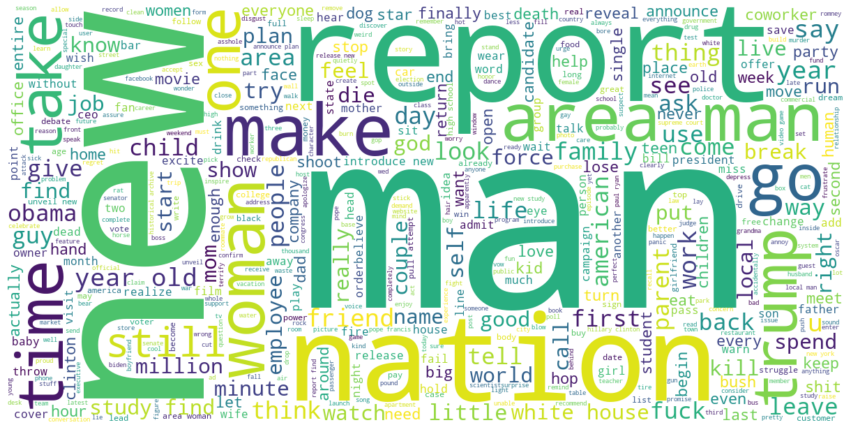

In [53]:
wordcloud = WordCloud(max_words=500, width=1200, height = 600, background_color='white').generate(" ".join(sarcastic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

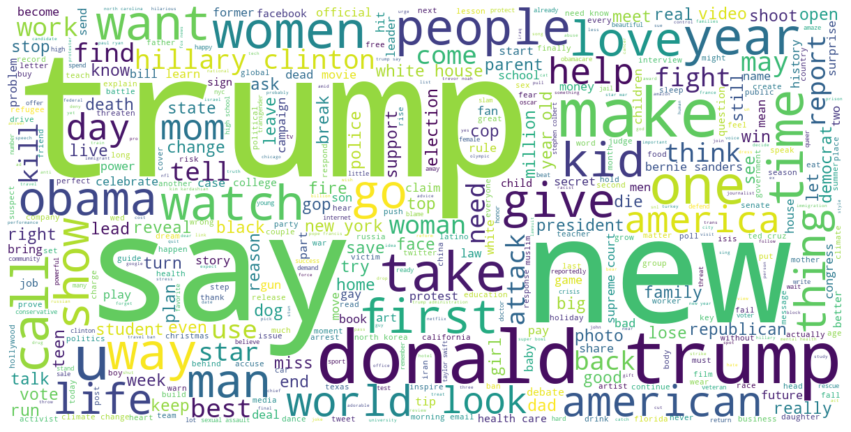

In [54]:
wordcloud = WordCloud(max_words=500, width=1200, height = 600, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [56]:
sentence = df['clean_headline']
label = df['is_sarcastic']

In [57]:
X_train, X_val, y_train, y_val = train_test_split(sentence, label, test_size=0.2, stratify=label, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

In [58]:
max_len = 20       
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  20852


In [59]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [60]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [61]:
embed_dim = 50  
heads = 2  
neurons = 32
maxlen = 20
vocab_size = 20910

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [62]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddin  (None, 20, 50)           1046500   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_encoder (Transf  (None, 20, 50)           23832     
 ormerEncoder)                                                   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 50)                0     

In [63]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [64]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32, callbacks=[earlystopping])

Epoch 1/25
1384/1384 [==============================] - 25s 17ms/step - loss: 0.4663 - accuracy: 0.7690 - val_loss: 0.3206 - val_accuracy: 0.8617
Epoch 2/25
1384/1384 [==============================] - 24s 17ms/step - loss: 0.2498 - accuracy: 0.9027 - val_loss: 0.2676 - val_accuracy: 0.8924
Epoch 3/25
1384/1384 [==============================] - 23s 17ms/step - loss: 0.1699 - accuracy: 0.9380 - val_loss: 0.2430 - val_accuracy: 0.9147
Epoch 4/25
1384/1384 [==============================] - 23s 16ms/step - loss: 0.1123 - accuracy: 0.9618 - val_loss: 0.2563 - val_accuracy: 0.9288
Epoch 4: early stopping


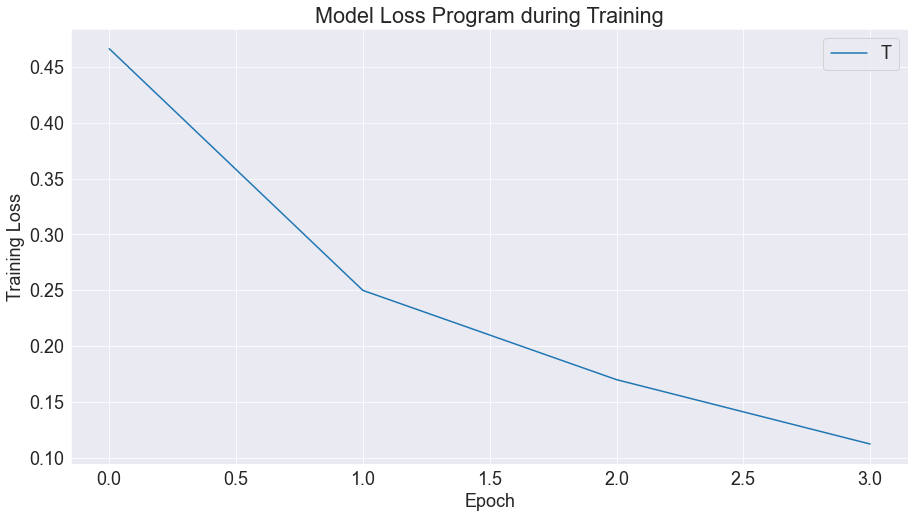

In [65]:
plt.plot(history.history['loss'])
plt.title("Model Loss Program during Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend('Training Loss')
plt.show()

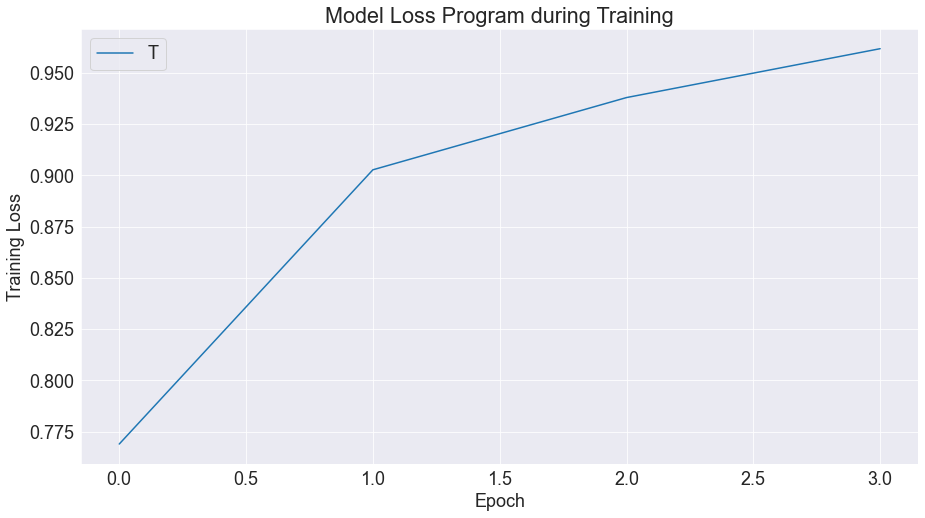

In [66]:
plt.plot(history.history['accuracy'])
plt.title("Model Loss Program during Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend('Training Loss')
plt.show()

In [67]:
history_test = model.fit(X_test,y_test,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32, callbacks=[earlystopping])

Epoch 1/25
173/173 [==============================] - 4s 21ms/step - loss: 0.2018 - accuracy: 0.9331 - val_loss: 0.1831 - val_accuracy: 0.9409
Epoch 2/25
173/173 [==============================] - 3s 20ms/step - loss: 0.0866 - accuracy: 0.9787 - val_loss: 0.2093 - val_accuracy: 0.9367
Epoch 2: early stopping


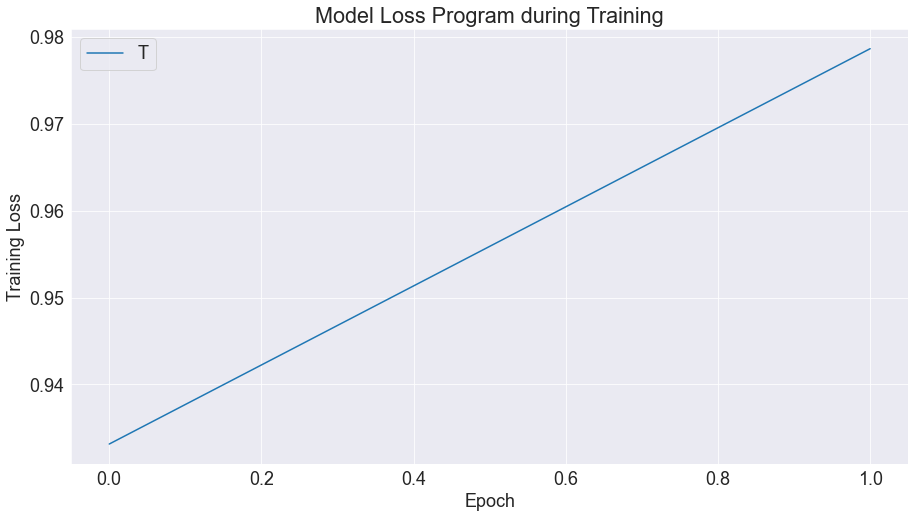

In [68]:
plt.plot(history_test.history['accuracy'])
plt.title("Model Loss Program during Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend('Training Loss')
plt.show()

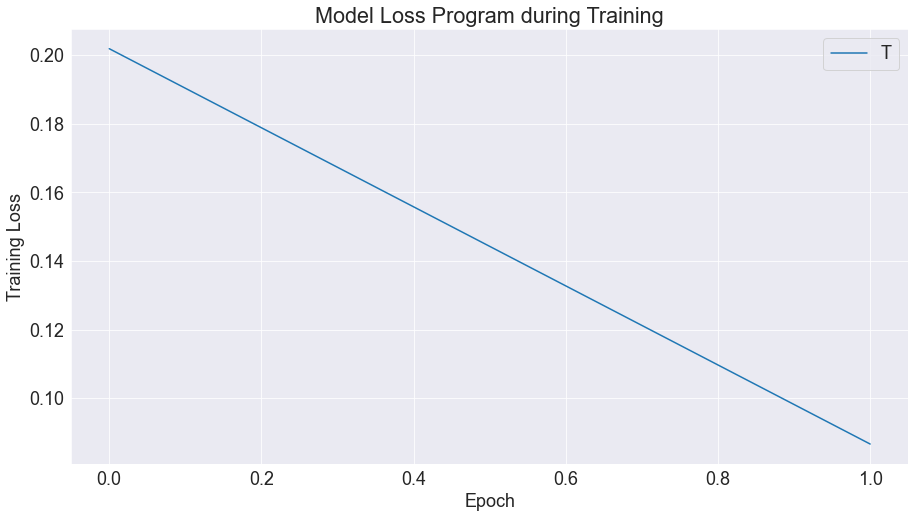

In [69]:
plt.plot(history_test.history['loss'])
plt.title("Model Loss Program during Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend('Training Loss')
plt.show()